In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/rossmann-store-sales/sample_submission.csv
/kaggle/input/rossmann-store-sales/store.csv
/kaggle/input/rossmann-store-sales/train.csv
/kaggle/input/rossmann-store-sales/test.csv


In [2]:
#Loading the Datasets
stores = pd.read_csv("../input/rossmann-store-sales/store.csv")

train = pd.read_csv("../input/rossmann-store-sales/train.csv", parse_dates = ['Date'])

/opt/conda/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3457: DtypeWarning: Columns (7) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


# Exploratory Data Analysis

In [3]:
#Reading the stores dataset
stores.head()

,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
1,2,a,a,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct"
2,3,a,a,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct"
3,4,c,c,620.0,9.0,2009.0,0,NaN,NaN,NaN
4,5,a,a,29910.0,4.0,2015.0,0,NaN,NaN,NaN


In [4]:
import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns

import plotly.offline as py
py.init_notebook_mode(connected=True)
import plotly.graph_objs as go
import plotly.tools as tls

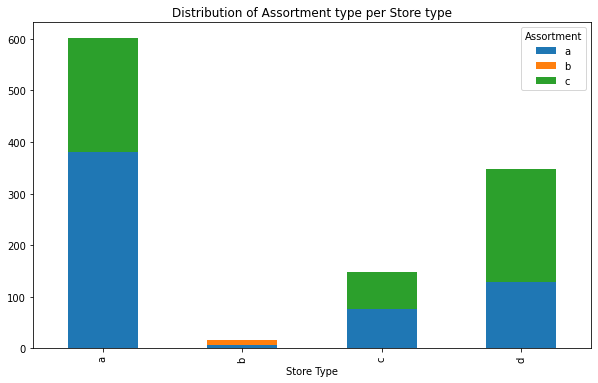

In [5]:
#Let's first do some EDA before cleaning our dataset
stores.groupby(['StoreType', 'Assortment']).size().unstack().plot(kind = 'bar', stacked = True,
                                                                 figsize = (10, 6))
plt.title("Distribution of Assortment type per Store type")
plt.xlabel("Store Type")
plt.show()

In [6]:
#Load train dataset
train.head()

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
0,1,5,2015-07-31,5263,555,1,1,0,1
1,2,5,2015-07-31,6064,625,1,1,0,1
2,3,5,2015-07-31,8314,821,1,1,0,1
3,4,5,2015-07-31,13995,1498,1,1,0,1
4,5,5,2015-07-31,4822,559,1,1,0,1


Merging both the datasets.

In [7]:
train = pd.merge(train, stores, on = 'Store', how = 'left')

As the sales during the day the store is closed will be zero, we do not require the days where stores are closed.

In [8]:
train_open = train[train.Open == 1].copy()
print (train_open.info())
train.head()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 844392 entries, 0 to 1017190
Data columns (total 18 columns):
 #   Column                     Non-Null Count   Dtype         
---  ------                     --------------   -----         
 0   Store                      844392 non-null  int64         
 1   DayOfWeek                  844392 non-null  int64         
 2   Date                       844392 non-null  datetime64[ns]
 3   Sales                      844392 non-null  int64         
 4   Customers                  844392 non-null  int64         
 5   Open                       844392 non-null  int64         
 6   Promo                      844392 non-null  int64         
 7   StateHoliday               844392 non-null  object        
 8   SchoolHoliday              844392 non-null  int64         
 9   StoreType                  844392 non-null  object        
 10  Assortment                 844392 non-null  object        
 11  CompetitionDistance        842206 non-null  float64

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,5,2015-07-31,5263,555,1,1,0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
1,2,5,2015-07-31,6064,625,1,1,0,1,a,a,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct"
2,3,5,2015-07-31,8314,821,1,1,0,1,a,a,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct"
3,4,5,2015-07-31,13995,1498,1,1,0,1,c,c,620.0,9.0,2009.0,0,NaN,NaN,NaN
4,5,5,2015-07-31,4822,559,1,1,0,1,a,a,29910.0,4.0,2015.0,0,NaN,NaN,NaN


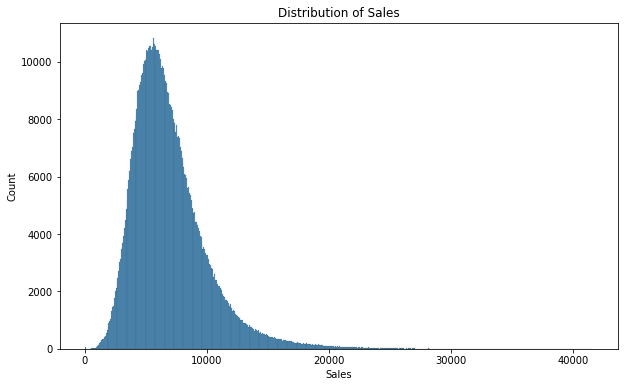

In [9]:
#Let's see the distribution of sales
plt.figure(figsize = (10, 6))
sns.histplot(train_open.Sales)
plt.title("Distribution of Sales")
plt.show()

From above we can see that the sales follow Normal Distrionbution with Right-skewed (Positively Skewed). 

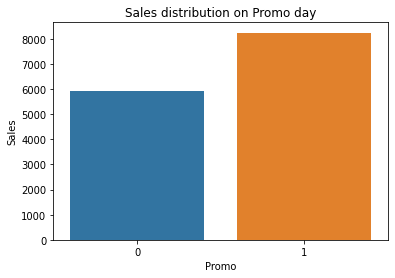

In [10]:
plt.figure(figsize = (6,4))
sns.barplot(x = 'Promo', y = 'Sales', data = train_open)
plt.title('Sales distribution on Promo day')
plt.show()

Sales is evenly distributed on both Promotional and Non-Promotional Day

In [11]:
train_open['StateHoliday'] = train_open['StateHoliday'].astype(str)
train_open.StateHoliday.unique()

array(['0', 'a', 'b', 'c'], dtype=object)

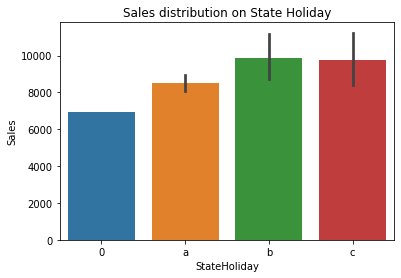

In [12]:
plt.figure(figsize = (6,4))
sns.barplot(x = 'StateHoliday', y = 'Sales', data = train_open)
plt.title('Sales distribution on State Holiday')
plt.show()

Sales is higher on holidays compared to non-holidays as expected.

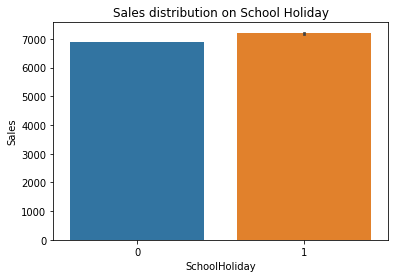

In [13]:
#Let's see the sales distribution in School Holiday
plt.figure(figsize = (6,4))
sns.barplot(x = 'SchoolHoliday', y = 'Sales', data = train_open)
plt.title('Sales distribution on School Holiday')
plt.show()

Sales doesn't seem to depend much on School Holidays

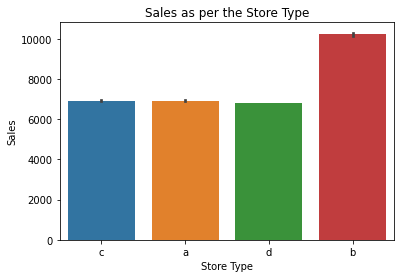

In [14]:
#Let's see which store type has more sales
sns.barplot(x = 'StoreType', y = 'Sales', data = train_open)
plt.title("Sales as per the Store Type")
plt.xlabel('Store Type')
plt.ylabel('Sales')
plt.show()

Except for the sales in type b, sales in all other types of stores are nearly identical

# Feature Engineering

Now we will prepare our file which will be suitable to be used in different Machine Learning Models

In [15]:
def feature_ext(df):
    '''Creating the dataset with the features in the required format'''
    
    #Creating Extra Columns out of Date 
    df['Year'] = df.Date.dt.year
    df['Month'] = df.Date.dt.month
    df['Day'] = df.Date.dt.day
    df['DayOfWeek'] = df.Date.dt.dayofweek
    df['WeekOfYear'] = df.Date.dt.weekofyear
    
    #fixing Promo and CompetitionSince columns by extending the features 
    
    df['CompetitionOpen'] = 12 * (df.Year - df.CompetitionOpenSinceYear) + (df.Month - df.CompetitionOpenSinceMonth)
    df['CompetitionOpen'] = df['CompetitionOpen'].apply(lambda x: 0 if x < 0 else x)
    
    df['PromoOpen'] = 12 * (df.Year - df.Promo2SinceYear) + (df.WeekOfYear - df.Promo2SinceWeek) / 4
    df['PromoOpen'] = df['PromoOpen'].apply(lambda x: 0 if x < 0 else x)
    
    #Mapping month name to the Months Column
    monthname = {1:'Jan', 2:'Feb', 3:'Mar', 4:'Apr', 5:'May', 6:'Jun',              
                 7:'Jul', 8:'Aug', 9:'Sept', 10:'Oct', 11:'Nov', 12:'Dec'}
    df['Month'] = df['Month'].map(monthname)
    
    #changing the dtype of Promo Interval Column
    df['PromoInterval'] = df['PromoInterval'].astype(str)
    
    #Fixing PromoInterval column with creating a binary column for the value in PromoInterval
    df['IsPromoMonth'] = 0 #empty column
    for values in df.PromoInterval.unique():
        for month in values.split(','):
            df.loc[(df.Month == month) & (df.PromoInterval == values), 'IsPromoMonth'] = 1
    
    return df
    
    

In [16]:
feature_ext(train_open)

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:9: FutureWarning:

Series.dt.weekofyear and Series.dt.week have been deprecated.  Please use Series.dt.isocalendar().week instead.



,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,StoreType,...,Promo2SinceWeek,Promo2SinceYear,PromoInterval,Year,Month,Day,WeekOfYear,CompetitionOpen,PromoOpen,IsPromoMonth
0,1,4,2015-07-31,5263,555,1,1,0,1,c,...,NaN,NaN,nan,2015,Jul,31,31,82.0,NaN,0
1,2,4,2015-07-31,6064,625,1,1,0,1,a,...,13.0,2010.0,"Jan,Apr,Jul,Oct",2015,Jul,31,31,92.0,64.50,1
2,3,4,2015-07-31,8314,821,1,1,0,1,a,...,14.0,2011.0,"Jan,Apr,Jul,Oct",2015,Jul,31,31,103.0,52.25,1
3,4,4,2015-07-31,13995,1498,1,1,0,1,c,...,NaN,NaN,nan,2015,Jul,31,31,70.0,NaN,0
4,5,4,2015-07-31,4822,559,1,1,0,1,a,...,NaN,NaN,nan,2015,Jul,31,31,3.0,NaN,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1016776,682,1,2013-01-01,3375,566,1,0,a,1,b,...,NaN,NaN,nan,2013,Jan,1,1,76.0,NaN,0
1016827,733,1,2013-01-01,10765,2377,1,0,a,1,b,...,NaN,NaN,nan,2013,Jan,1,1,159.0,NaN,0
1016863,769,1,2013-01-01,5035,1248,1,0,a,1,b,...,48.0,2012.0,"Jan,Apr,Jul,Oct",2013,Jan,1,1,NaN,0.25,1
1017042,948,1,2013-01-01,4491,1039,1,0,a,1,b,...,NaN,NaN,nan,2013,Jan,1,1,NaN,NaN,0


In [17]:
def split_data(df):
    df_ = df.drop('Date', axis = 1)
    cols = df_.columns
    num_cols = df_._get_numeric_data().columns #getting columns with numeric data
    cat_cols = list(set(cols) - set(num_cols)) #getting the columns with categorical data
    num_df = df[num_cols]
    cat_df = df[cat_cols]
    
    return num_df, cat_df

In [18]:
num_df, cat_df = split_data(train_open)

In [19]:
#Looking at the null values in the num_df
num_df.isnull().sum()

Store                             0
DayOfWeek                         0
Sales                             0
Customers                         0
Open                              0
Promo                             0
SchoolHoliday                     0
CompetitionDistance            2186
CompetitionOpenSinceMonth    268619
CompetitionOpenSinceYear     268619
Promo2                            0
Promo2SinceWeek              423307
Promo2SinceYear              423307
Year                              0
Day                               0
WeekOfYear                        0
CompetitionOpen              268619
PromoOpen                    423307
IsPromoMonth                      0
dtype: int64

In [20]:
#we can fill the null values with 0 in all the columns except the CompetitionDistance column
#We will fill the CompetitionDistance column with median value of the distance
#Then we will scale the numerical data using MinMax Scaler 
from sklearn.preprocessing import MinMaxScaler

def fix_num(df):
    
    median_dist = df['CompetitionDistance'].median()
    df['CompetitionDistance'] = df['CompetitionDistance'].fillna(value = median_dist)
    
    df = df.fillna(value = 0)
        
    scaler = MinMaxScaler().fit(df)
    scaled_cols = list(df.columns)
    df[scaled_cols] = scaler.transform(df)
    
    df = df[scaled_cols]
        
    return df

In [21]:
num_df = fix_num(num_df)

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:9: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [22]:
#we will encode the values in categorical columns using OneHotEncoder
from sklearn.preprocessing import OneHotEncoder

#fixing categorical df
def fix_cat(df):
    
    df = df.drop('PromoInterval', axis = 1)
    
    df = df.fillna(method = 'ffill') #filling the null values with forward fill method
    
    encoder = OneHotEncoder(sparse = False).fit(df)
    encoded_cols = list(encoder.get_feature_names(df.columns))
    
    df[encoded_cols] = encoder.transform(df)
    
    df = df[encoded_cols]
    
    return df    

In [23]:
cat_df = fix_cat(cat_df)

In [24]:
#Now we will join the three dataset again to finally get our dataset apt for Machine Learning Model

def join_all(df1, df2):
    
    df = df1.join(df2)
            
    return df

In [25]:
train_df = join_all(num_df, cat_df)

In [26]:
train_df.head()

,Store,DayOfWeek,Sales,Customers,Open,Promo,SchoolHoliday,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,...,Month_Dec,Month_Feb,Month_Jan,Month_Jul,Month_Jun,Month_Mar,Month_May,Month_Nov,Month_Oct,Month_Sept
0,0.000000,0.666667,0.126664,0.075122,0.0,1.0,1.0,0.016482,0.750000,0.996526,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.000898,0.666667,0.145941,0.084597,0.0,1.0,1.0,0.007252,0.916667,0.996030,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.001795,0.666667,0.200091,0.111126,0.0,1.0,1.0,0.186050,1.000000,0.995533,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.002693,0.666667,0.336815,0.202761,0.0,1.0,1.0,0.007911,0.750000,0.997022,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.003591,0.666667,0.116050,0.075663,0.0,1.0,1.0,0.394119,0.333333,1.000000,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0


# Modelling and Testing

To start with modelling and testing process we will split the train_df dataset into training and testing part.

Here Sale column is our target variable and rest of the columns are our feature variable.

In [27]:
from sklearn.model_selection import train_test_split

X = train_df.drop('Sales', axis = 1)

y = train_df['Sales']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.30, random_state = 101)

First we will run a plain linear regression and record our baseline model performance score and then we will run other models and compare it with our baseline score.

In [28]:
import time
from sklearn.linear_model import LinearRegression,SGDRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_squared_error
from xgboost import XGBRegressor

In [29]:
#Initialize Linear Regression
lr = LinearRegression()

In [30]:
lr.fit(X_train, y_train)
pred = lr.predict(X_test)

print("Mean Squared Error: ", np.sqrt(mean_squared_error(y_test, pred)))

Mean Squared Error:  0.030544489521602578


In [31]:
#let's prepare the model pipelines

def model_perform(model, X_train, X_test, y_train, y_test):
    
    start = time.time()
    model = model.fit(X_train, y_train)
    pred = model.predict(X_test)
    score = np.sqrt(mean_squared_error(y_test, pred))
    
    end = time.time()
    time_taken  = end - start
    
    return score, time_taken

pipelines = [('RandomForesstRegressor', RandomForestRegressor()),
             ('Linear Regression', LinearRegression()),
             ('SGD Regressor', SGDRegressor()),
              ('XGBoostRegressor', XGBRegressor())]

Scores = {'Model_name': [],
          'Score': [],
          'Time_taken_in_secs': []}

for model_name, model in pipelines:
  score, time_taken = model_perform(model, X_train, X_test, y_train, y_test)
  Scores['Model_name'].append(model_name)
  Scores['Score'].append(score)
  Scores['Time_taken_in_secs'].append(time_taken)

In [32]:
Scores = pd.DataFrame.from_dict(Scores)

In [33]:
Scores

,Model_name,Score,Time_taken_in_secs
0,RandomForesstRegressor,0.011518,777.531653
1,Linear Regression,0.030544,0.929346
2,SGD Regressor,0.031784,1.486170
3,XGBoostRegressor,0.012911,65.942479


Our Best models from the above are Random Forrest and XGBoost. However, XGBoost took a lot less time, so we will do the Hyper Parameter tuning using K-Fold cross-validation with the help of Grid-Search CV

# Hyper Parameter Tuning

In [34]:
from sklearn.model_selection import GridSearchCV

In [35]:
param_grid = {'min_child_weight': [1, 5, 10],
              'gamma': [0.5, 1, 1.5],
              'max_depth': [3, 4, 5]
              }

xgb_grid = GridSearchCV(estimator = XGBRegressor(), param_grid = param_grid, 
                        scoring='neg_mean_squared_error',
                        cv = 3, n_jobs = -1, verbose=2)

In [36]:
%%time
xgb_grid.fit(X_train, y_train)

xgb_best = xgb_grid.best_estimator_

print("Best Score: ", xgb_grid.best_score_)
print("Best Params: ", xgb_grid.best_params_)

Fitting 3 folds for each of 27 candidates, totalling 81 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed: 22.4min
[Parallel(n_jobs=-1)]: Done  81 out of  81 | elapsed: 55.1min finished


Best Score:  -0.0005542995209402243
Best Params:  {'gamma': 0.5, 'max_depth': 5, 'min_child_weight': 1}
CPU times: user 3min 34s, sys: 1.62 s, total: 3min 35s
Wall time: 56min
